### Let's write an elementary tokenizer that uses words as tokens.

We will use Mark Twain's _Life On The Mississippi_ as a test bed. The text is in the accompanying file 'Life_On_The_Mississippi.txt'

Here's a not-terribly-good such tokenizer:

In [1]:
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:

        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

nitem = 0 ; maxitems = 100
for item in wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems: break


('\ufeffThe', 1)
('Project', 79)
('Gutenberg', 22)
('eBook', 4)
('of', 4469)
('Life', 5)
('on', 856)
('the', 8443)
('Mississippi', 104)
('This', 127)
('ebook', 2)
('is', 1076)
('for', 1017)
('use', 34)
('anyone', 4)
('anywhere', 8)
('in', 2381)
('United', 36)
('States', 26)
('and', 5692)
('most', 119)
('other', 223)
('parts', 5)
('world', 40)
('at', 676)
('no', 325)
('cost', 18)
('with', 1053)
('almost', 37)
('restrictions', 2)
('whatsoever.', 2)
('You', 92)
('may', 85)
('copy', 12)
('it,', 199)
('give', 67)
('it', 1382)
('away', 107)
('or', 561)
('re-use', 2)
('under', 112)
('terms', 22)
('License', 8)
('included', 2)
('this', 591)
('online', 4)
('www.gutenberg.org.', 4)
('If', 85)
('you', 813)
('are', 361)
('not', 680)
('located', 9)
('States,', 8)
('will', 287)
('have', 557)
('to', 3518)
('check', 4)
('laws', 13)
('country', 50)
('where', 152)
('before', 150)
('using', 10)
('eBook.', 2)
('Title:', 1)
('Author:', 1)
('Mark', 2)
('Twain', 2)
('Release', 1)
('date:', 1)
('July', 7)
('1

This is unsatisfactory for a few reasons:

* There are non-ASCII (Unicode) characters that should be stripped (the so-called "Byte-Order Mark" or BOM \ufeff at the beginning of the text);

* There are punctuation marks, which we don't want to concern ourselves with;

* The same word can appear capitalized, or lower-case, or with its initial letter upper-cased, whereas we want them all to be normalized to lower-case.

Part 1 of this assignment: insert code in this loop to operate on the str variable 'line' so as to fix these problems before 'line' is split into words.

A hint to one possible way to do this: use the 'punctuation' character definition in the Python 'string' module, the 'maketrans' and 'translate' methods of Python's str class, to eliminate punctuation, and the regular expression ('re') Python module to eliminate any Unicode---it is useful to know that the regular expression r'[^\x00-x7f]' means "any character not in the vanilla ASCII set.

Part 2: Add code to sort the contents of wdict by word occurrence frequency.  What are the top 100 most frequent word tokens?  Adding up occurrence frequencies starting from the most frequent words, how many distinct words make up the top 90% of word occurrences in this "corpus"?

For this part, the docs of Python's 'sorted' and of the helper 'itemgetter' from 'operator' reward study.

Write your modified code in the cell below.

In [2]:
import string
import re
from operator import itemgetter

# Remove non-ASCII characters (including BOM), punctuation, and normalize case
translator = str.maketrans('', '', string.punctuation)
wdict = {}
with open('Life_On_The_Mississippi.txt', 'r') as L:
    line = L.readline()
    nlines = 1
    while line:
        # Remove non-ASCII characters
        line = re.sub(r'[^\x00-\x7F]+', '', line)
        # Remove punctuation and normalize case
        line = line.translate(translator).lower()
        
        words = line.split()
        for word in words:
            if wdict.get(word) is not None:
                wdict[word] += 1
            else:
                wdict[word] = 1
        line = L.readline()
        nlines += 1

# Sort the contents of wdict by word occurrence frequency
sorted_wdict = dict(sorted(wdict.items(), key=itemgetter(1), reverse=True))

# Print the top 100 most frequent word tokens
nitem = 0
maxitems = 100
for item in sorted_wdict.items():
    nitem += 1
    print(item)
    if nitem == maxitems:
        break

# Calculate the number of distinct words that make up the top 90% of word occurrences
total_words = sum(sorted_wdict.values())
top_90_percent_words = 0
sum_occurrences = 0
for word, freq in sorted_wdict.items():
    sum_occurrences += freq
    if sum_occurrences >= total_words * 0.9:
        top_90_percent_words = len(sorted_wdict) - nitem
        break

print(f"Number of distinct words making up the top 90% of word occurrences: {top_90_percent_words}")


('the', 9255)
('and', 5892)
('of', 4532)
('a', 4053)
('to', 3592)
('in', 2593)
('it', 2293)
('i', 2205)
('was', 2093)
('that', 1724)
('he', 1402)
('is', 1148)
('for', 1095)
('with', 1081)
('you', 1033)
('his', 961)
('had', 961)
('but', 952)
('on', 947)
('as', 881)
('this', 781)
('they', 758)
('at', 750)
('not', 722)
('all', 720)
('by', 713)
('one', 686)
('there', 627)
('were', 625)
('be', 617)
('my', 582)
('or', 581)
('from', 577)
('have', 571)
('out', 541)
('so', 536)
('up', 529)
('him', 523)
('we', 519)
('me', 516)
('when', 505)
('would', 478)
('which', 476)
('river', 457)
('an', 440)
('them', 425)
('no', 422)
('then', 405)
('said', 399)
('are', 387)
('if', 381)
('their', 378)
('now', 369)
('about', 346)
('time', 337)
('been', 335)
('down', 328)
('its', 323)
('could', 313)
('has', 305)
('will', 301)
('into', 300)
('what', 285)
('her', 278)
('two', 273)
('do', 271)
('other', 270)
('some', 269)
('man', 260)
('new', 259)
('any', 238)
('got', 234)
('these', 233)
('she', 233)
('who', 229)

In [3]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import sys
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize'] = [100, 60]

# Load BERT.
model = BertModel.from_pretrained('bert-large-uncased-whole-word-masking')
# Set the model to eval mode.
model.eval()
# This notebook assumes CPU execution. If you want to use GPUs, put the model on cuda and modify subsequent code blocks.
#model.to('cuda')
# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

# Save the BERT vocabulary to a file -- by default it will name this file "vocab.txt".
tokenizer.save_vocabulary(save_directory='.')

print("The vocabulary size is: ", model.config.vocab_size) # Size of the vocabulary

The vocabulary size is:  30522


In [4]:
# Get BERT's vocabulary embeddings.
wordembs = model.get_input_embeddings()

# Convert the vocabulary embeddings to numpy.
allinds = np.arange(0,model.config.vocab_size,1)
inputinds = torch.LongTensor(allinds)
bertwordembs = wordembs(inputinds).detach().numpy()
print(bertwordembs.shape)

(30522, 1024)


In [5]:
# Read in the vocabulary
filename = "vocab.txt"
with open(filename,'r') as f:
    bertwords = np.array([])
    for line in f:
        bertwords = np.append(bertwords, line.rstrip())

# Determine vocabulary to use for t-SNE/visualization. The indices are hard-coded based partially on inspection:
bert_char_indices_to_use = np.arange(999, 1063, 1)
bert_voc_indices_to_plot = np.append(bert_char_indices_to_use, np.arange(1996, 5932, 1))
bert_voc_indices_to_use = np.append(bert_char_indices_to_use, np.arange(1996, 11932, 1))

bert_voc_indices_to_use_tensor = torch.LongTensor(bert_voc_indices_to_use)
bert_word_embs_to_use = wordembs(bert_voc_indices_to_use_tensor).detach().numpy()
bert_words_to_plot = bertwords[bert_voc_indices_to_plot]


print(len(bert_voc_indices_to_plot))
print(len(bert_voc_indices_to_use))

4000
10000


In [6]:
# Run t-SNE on the BERT vocabulary embeddings we selected:
mytsne_words = TSNE(n_components=2,early_exaggeration=12,verbose=2,metric='cosine',init='pca',n_iter=2500)
bert_word_embs_to_use_tsne = mytsne_words.fit_transform(bert_word_embs_to_use)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.477s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.267747
[t-SNE] Computed conditional probabilities in 0.168s
[t-SNE] Iteration 50: error = 97.8541946, gradient norm = 0.0068401 (50 iterations in 0.661s)
[t-SNE] It

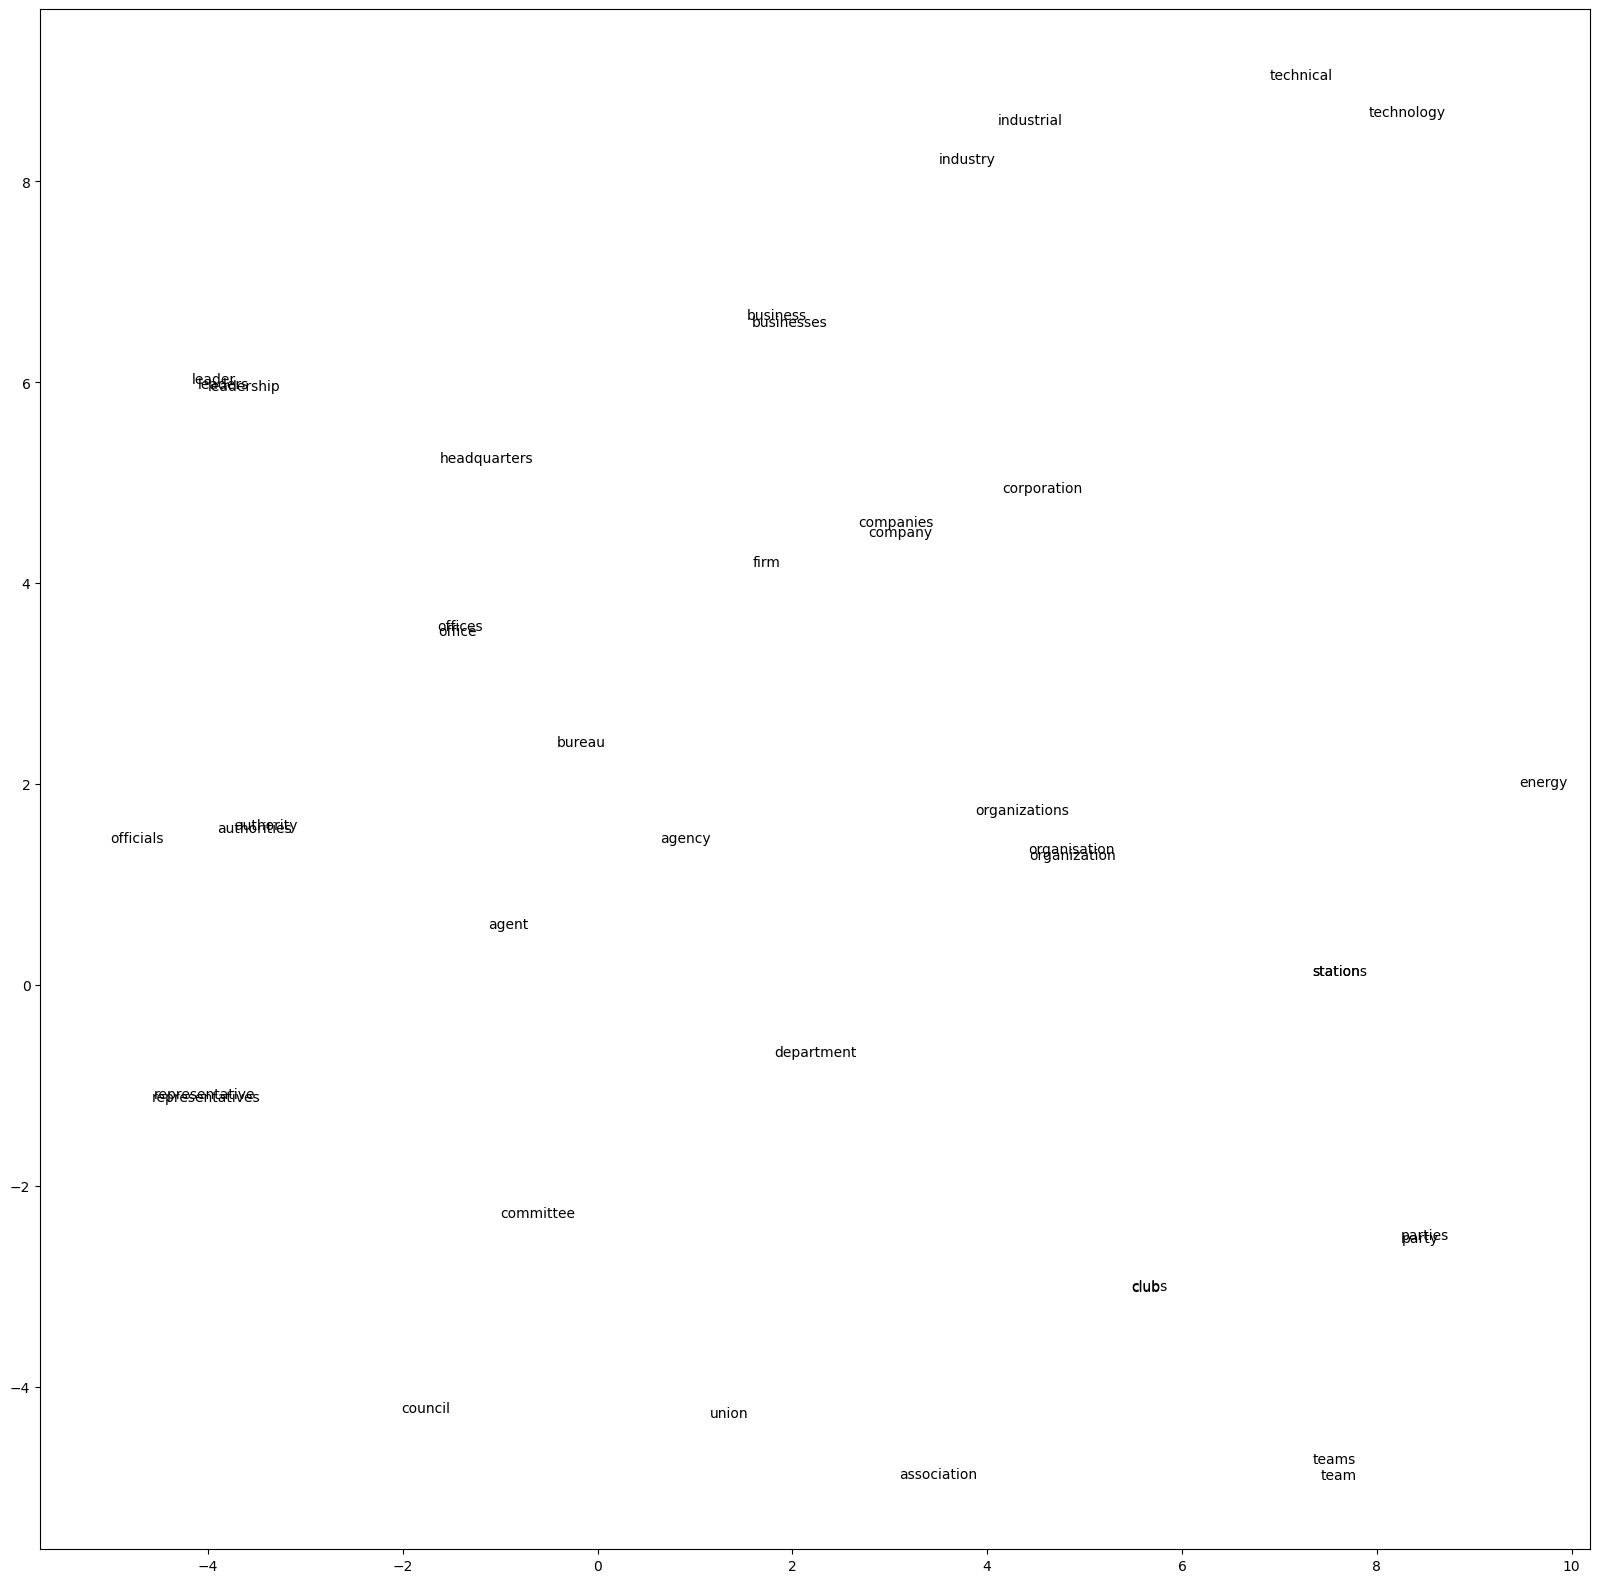

In [7]:
# Adjust figure size (adjust these values as needed)
fig = plt.figure(figsize=(20, 20))
alltexts = []

# Zoom in on a specific region (adjust these values as needed)
x_min, x_max = -5, 10
y_min, y_max = -5, 10

for i, txt in enumerate(bert_words_to_plot):
    x, y = bert_word_embs_to_use_tsne[i, 0], bert_word_embs_to_use_tsne[i, 1]
    if x_min <= x <= x_max and y_min <= y <= y_max:
        plt.scatter(x, y, s=0)
        currtext = plt.text(x, y, txt, family='sans-serif')
        alltexts.append(currtext)

# Save the plot before adjusting.
plt.savefig('viz-bert-voc-tsne10k-viz4k-zoomed.pdf', format='pdf')

plt.show()

In [8]:
# Business, organization, firm, company, coperation and industry are clustered together, which was quiete interresting based on their roles in modern society.